In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


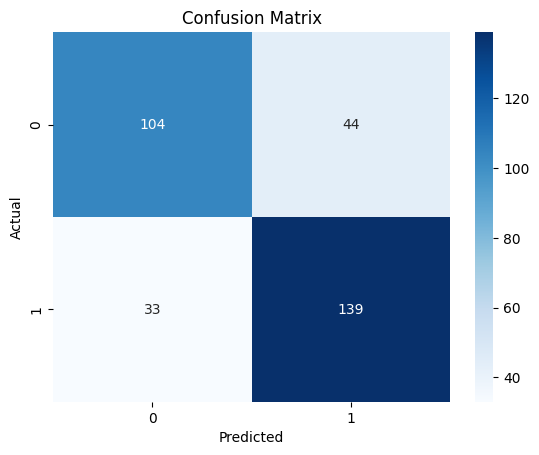

Accuracy: 0.759375
Precision: 0.7595628415300546
Recall: 0.8081395348837209
F1-score: 0.7830985915492957


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file = '/content/drive/MyDrive/Colab Notebooks/winequality-red.csv'
data = pd.read_csv(file)

data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = LogisticRegression(max_iter=1000, random_state=100)
model.fit(X_train, y_train)

pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
